In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
#Load data
train_df = pd.read_csv('./competitions/ken3450/train.csv')
test_df  = pd.read_csv('./competitions/ken3450/test.csv')

train_df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,topic_05,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,12,145,0.765517,1.0,0.849462,7,4,0,1,4.737931,...,0.170210,0.384615,0.126603,0.048276,0.027586,0.636364,0.363636,0.300000,0.200000,10200
1,10,526,0.578732,1.0,0.725857,25,1,1,0,4.389734,...,0.197705,0.625534,0.130821,0.064639,0.015209,0.809524,0.190476,0.000000,0.000000,1400
2,13,805,0.586928,1.0,0.743833,36,6,30,1,4.513043,...,0.025001,0.474369,0.006300,0.022360,0.024845,0.473684,0.526316,0.370833,-0.045833,2200
3,7,831,0.540506,1.0,0.662963,48,2,12,0,5.018051,...,0.033344,0.527098,0.145105,0.039711,0.022864,0.634615,0.365385,0.300000,1.000000,1300
4,9,370,0.548023,1.0,0.649533,14,1,12,0,4.702703,...,0.020006,0.566562,0.201875,0.054054,0.016216,0.769231,0.230769,1.000000,-0.500000,4300


In [3]:
train_df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,topic_05,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
count,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,...,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000
mean,10.389130,546.209700,0.553974,1.005415,0.694577,10.932096,3.287795,4.513941,1.255070,4.549722,...,0.234673,0.443603,0.119238,0.039634,0.016579,0.682482,0.287753,0.281630,0.071811,3408.992668
std,2.111083,466.983063,4.064571,6.039691,3.768807,11.438180,3.854408,8.235746,4.149052,0.841505,...,0.289968,0.116461,0.096368,0.017438,0.010755,0.189839,0.155851,0.324193,0.264148,11561.815887
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000
25%,9.000000,247.000000,0.470958,1.000000,0.625917,4.000000,1.000000,1.000000,0.000000,4.479675,...,0.028574,0.396136,0.058323,0.028417,0.009615,0.600000,0.185185,0.000000,0.000000,950.000000
50%,10.000000,410.000000,0.538991,1.000000,0.690236,8.000000,3.000000,1.000000,0.000000,4.664000,...,0.040582,0.453499,0.118968,0.039039,0.015306,0.710843,0.279070,0.125000,0.000000,1400.000000
75%,12.000000,716.000000,0.607843,1.000000,0.754237,14.000000,4.000000,4.000000,1.000000,4.856305,...,0.402668,0.508788,0.177778,0.050314,0.021672,0.800000,0.384615,0.500000,0.148611,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,0.927119,1.000000,0.727841,0.155488,0.162037,1.000000,1.000000,1.000000,1.000000,843300.000000


# Correlations between features and target

In [3]:
from pandas.plotting import scatter_matrix

clickbait = train_df.copy()
corr_matrix = clickbait.corr()
corr_matrix["shares"].sort_values(ascending=False)

shares                           1.000000
kw_avg_avg                       0.116645
topic_04                         0.089409
kw_max_avg                       0.066186
self_reference_min_shares        0.063436
self_reference_avg_sharess       0.062320
kw_min_avg                       0.046964
self_reference_max_shares        0.045650
num_hrefs                        0.042656
num_imgs                         0.042256
global_subjectivity              0.031844
num_videos                       0.026684
title_subjectivity               0.019833
is_weekend                       0.019474
weekday_is_saturday              0.017957
num_keywords                     0.017614
weekday_is_monday                0.013663
n_tokens_title                   0.010438
weekday_is_sunday                0.008820
title_sentiment_polarity         0.008477
data_channel_is_lifestyle        0.006847
global_sentiment_polarity        0.006539
global_rate_negative_words       0.005176
data_channel_is_socmed           0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c4e3e2eb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3c4e1db320>]], dtype=object)

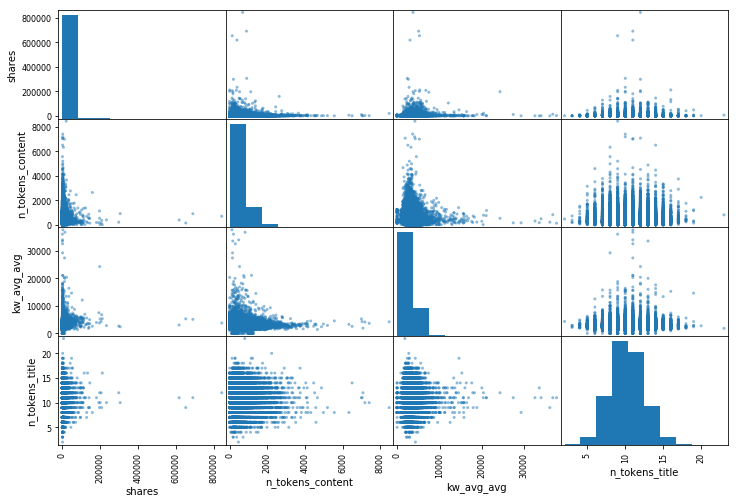

In [5]:
attributes = ["shares", "n_tokens_content", "kw_avg_avg", "n_tokens_title"]
scatter_matrix(clickbait[attributes], figsize=(12,8))

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn import metrics

RANDOM_STATE = 42

X = clickbait.drop("shares", axis=1)
y = clickbait["shares"]

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(2) , SVR(kernel='poly', C=1e3, degree=2))
std_clf.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svr', SVR(C=1000.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [37]:
_pred = std_clf.predict(test_df)

df = pd.DataFrame({
        'id': pd.Series(range(1,9912)),
        'shares': _pred
    })

In [38]:
pred_test_std = std_clf.predict(X_test)

metrics.mean_squared_error(pred_test_std, y_test)

116773992.78898649

In [42]:
df.head()

,id,shares
0,1,1431.613061
1,2,1446.717806
2,3,1311.219613
3,4,1414.808918
4,5,1332.677191


In [43]:
df.to_csv("sol.csv", index=False)

In [44]:
import tensorflow as tf

In [ ]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X_train, n_hidden1, name="hidden1",
                             activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden1",
                             activation=tf.nn.relu)
    